In [19]:
## 유방암 데이터 셋 준비 

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # training/test data 나누기

cancer = load_breast_cancer()

In [5]:
print(cancer.data.shape, cancer.target.shape) 
# 569 sample, 30 feature

(569, 30) (569,)


In [8]:
cancer.target[:5]

# 0 : 정상 종양
# 1 : 악성 종양

array([0, 0, 0, 0, 0])

In [13]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

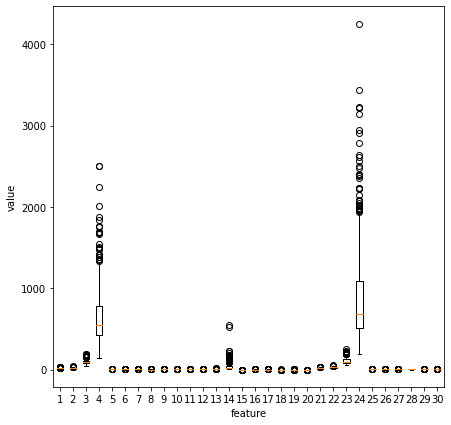

In [12]:
## 데이터 세트를 이용한 boxplot

fig, ax = plt.subplots(figsize=(7, 7))

ax.boxplot(cancer.data)
ax.set_xlabel('feature')
ax.set_ylabel('value')
plt.show()


In [14]:
cancer.feature_names[[2, 13, 23]]

array(['mean perimeter', 'area error', 'worst area'], dtype='<U23')

In [16]:
# 샘플의 갯수 확인하기

np.unique(cancer.target, return_counts=True)
# 데이터의 종류와 그 갯수 확인 # 정상종양 과 악성 종양

(array([0, 1]), array([212, 357]))

In [17]:
# 훈련데이터 저장하기
x = cancer.data
y = cancer.target

In [18]:
## 로지스특 회귀를 위한 뉴런을 만든다 ##

In [21]:
## 훈련 데이터 세트와 테스트 데이터 세트로 나누기 ##
# 사이킷런이 알아서 해줌

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2,\
                                                    random_state=42)


In [24]:
# 데이터 비율 확인하기 1:4
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(455, 30) (455,)
(114, 30) (114,)
(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [45]:
from ast import Return
## 로지스틱 회귀 구현하기

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b    # 직선의 방정식을 계산합니다.
        return z

    def backprop(self, x, err):          # 가중치와 절편에 대한 그레디언트를 계산한다. 
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    ## activation() 메서드의 구현

    def activation(self, z):
        z = np.clip(z, -100, None)              # 안전한 exp 계산을 위한 조치
        a = 1/ (1 + np.exp(-1))
        return a

    ## 훈련하는 메서드 구현 fit() 

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad



    ## 예측하는 메서드 구현하기 predict()

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 선형 함수의 적용
        a = self.activation(np.array(z))         # 활성화 함수의 적용
        return a > 0.5                          # 계단함수 적용

    ## 정확도 계산하기 score

    def score(self, x, y):
        return np.mean(self.pridic(x) == y)

In [43]:
## 모델 훈련하기

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [44]:
np.mean(neuron.predict(x_test) == y_test)

0.631578947368421